### Results of PTM-ramping PeaksDB searches and de novo sequencing after open modifcation PeaksPTM searches

- Open modifcation searches consider mass mofications from the entire [Unimod database](http://www.unimod.org/modifications_list.php). 

- We then took the top 8 modifications from open searchs for each dataset and added them in ramping searches or sequencing queries to determine sensitivity loss vs. identification gain.

In [1]:
# LIBRARIES
#import pandas library for working with tabular data
import os
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde
#from matplotlib_venn import venn2
#from matplotlib_venn import venn3
from matplotlib_venn import venn3, venn3_circles
#import regular expresson (regex)
import re
#check pandas version
pd.__version__

'1.0.5'

In [2]:
cd /home/millieginty/Documents/git-repos/2017-etnp/analyses/pronovo-2020/pronovo-2020-ptm/

/home/millieginty/Documents/git-repos/2017-etnp/analyses/pronovo-2020/pronovo-2020-ptm


In [5]:
# read in as a dataframe the MED4 ramping results
# same with ETNP results

med4 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/analyses/pronovo-2020/pronovo-2020-ptm/open-mod-results-med4.csv")
etnp = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/analyses/pronovo-2020/pronovo-2020-ptm/open-mod-results-etnp.csv")

med4.head()

,Number of variable PTMs,total PSMs at 1% FDR,total peptides,total proteins,de novo peptides 80ALC,de novo peptides 50ALC,de novo only peptides 80ALC,de novo only peptides 50ALC
0,0,20231,11532,1351,6646,16544,552,4001
1,1,21311,12085,1349,6722,16630,503,3667
2,2,21756,12671,1342,6475,16233,443,3390
3,3,22942,13679,1338,6247,16214,432,3397
4,4,23354,13994,1336,6245,16333,434,3339


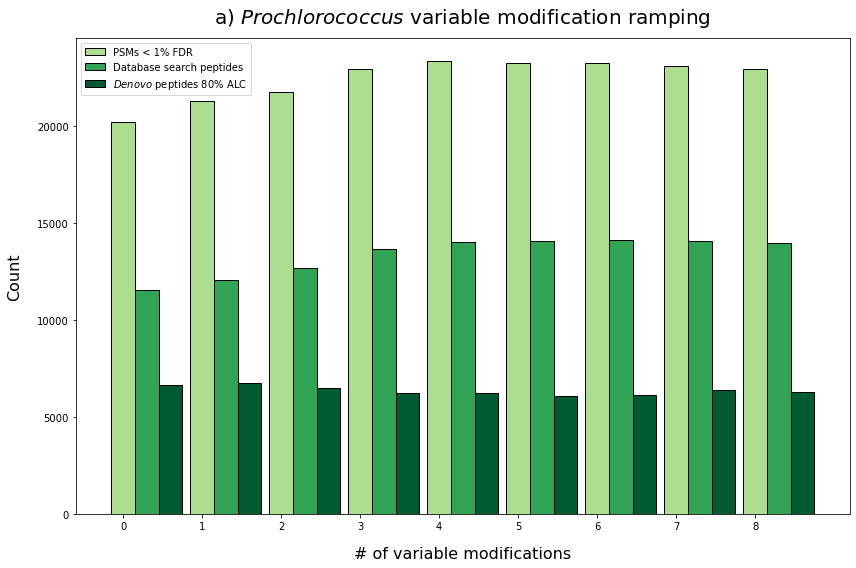

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))

# Define bar width
bar_width = 0.3

# Add the `width` parameter now which sets the width of each bar.
b1 = ax.bar(med4['Number of variable PTMs'], med4['total PSMs at 1% FDR'],
            width=bar_width, color = '#addd8e', edgecolor = 'black')
# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(med4['Number of variable PTMs'] + bar_width, med4['total peptides'],
            width=bar_width, color = '#31a354', edgecolor = 'black')
# Same thing, but offset the x by the width of the bar.
b3 = ax.bar(med4['Number of variable PTMs'] + bar_width*2, med4['de novo peptides 80ALC'],
            width=bar_width, color = '#005a32', edgecolor = 'black')

plt.legend(['PSMs < 1% FDR', 'Database search peptides', '$De novo$ peptides 80% ALC'])

ax.set_xlabel('# of variable modifications', labelpad=15, fontsize = 16)
ax.set_ylabel('Count', labelpad=15, fontsize = 16)
ax.set_title('a) $Prochlorococcus$ variable modification ramping', pad=15, fontsize = 20)
ax.set_xticks(med4['Number of variable PTMs'])

fig.tight_layout()

# save plot

plt.savefig("MED4-variable-mod-bar.png")

# also save in manuscript latex dir high res
plt.savefig("/home/millieginty/Documents/git-repos/denovo-etnp/MED4-variable-mod-bar.png", dpi = 300, bbox_inches='tight')

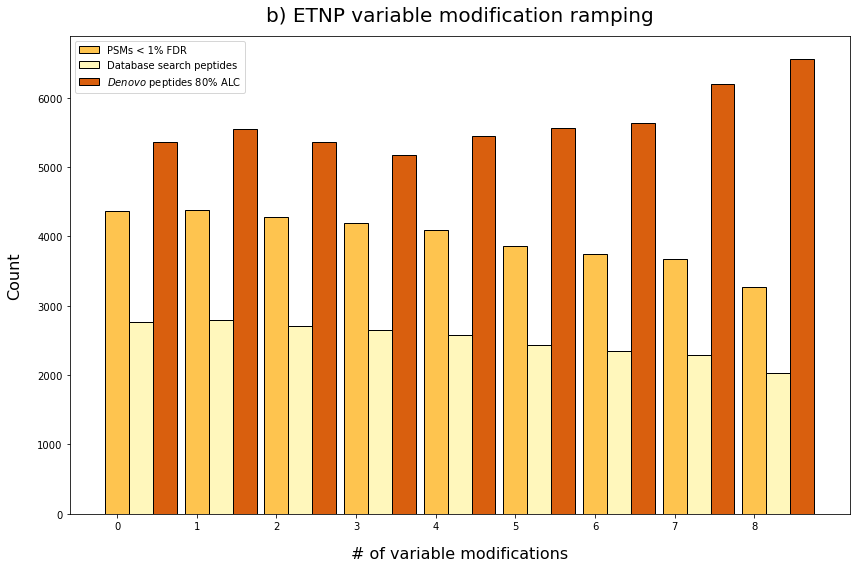

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))

# Define bar width
bar_width = 0.3

# Add the `width` parameter now which sets the width of each bar.
b1 = ax.bar(etnp['Number of variable PTMs'], etnp['total PSMs at 1% FDR'],
            width=bar_width, color = '#fec44f', edgecolor = 'black')
# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(etnp['Number of variable PTMs'] + bar_width, etnp['total peptides'],
            width=bar_width, color = '#fff7bc', edgecolor = 'black')
# Same thing, but offset the x by the width of the bar.
b3 = ax.bar(etnp['Number of variable PTMs'] + bar_width*2, etnp['de novo peptides 80ALC'],
            width=bar_width, color = '#d95f0e', edgecolor = 'black')

plt.legend(['PSMs < 1% FDR', 'Database search peptides', '$De novo$ peptides 80% ALC'])

ax.set_xlabel('# of variable modifications', labelpad=15, fontsize = 16)
ax.set_ylabel('Count', labelpad=15, fontsize = 16)
ax.set_title('b) ETNP variable modification ramping', pad=15, fontsize = 20)
ax.set_xticks(etnp['Number of variable PTMs'])

fig.tight_layout()

# save plot

plt.savefig("etnp-variable-mod-bar.png")

# also save in manuscript latex dir high res
plt.savefig("/home/millieginty/Documents/git-repos/denovo-etnp/etnp-variable-mod-bar.png", dpi = 300, bbox_inches='tight')